# Learning New Features

**(Run this cell to define useful Latex macros)**
\\[
\newcommand{\bigoh}[1]{\mathcal{O}\left(#1\right)}
\newcommand{\card}[1]{\left\lvert#1\right\rvert}
\newcommand{\condbar}[0]{\,\big|\,}
\newcommand{\eprob}[1]{\widehat{\text{Pr}}\left[#1\right]}
\newcommand{\norm}[1]{\left\lvert\left\lvert#1\right\rvert\right\rvert}
\newcommand{\prob}[1]{\text{Pr}\left[#1\right]}
\newcommand{\pprob}[2]{\text{Pr}_{#1}\left[#2\right]}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\fpartial}[2]{\frac{\partial #1}{\partial #2}}
\\]

### Building the XOR relationship

Before we do that, I want to show you a multiple step process of refeaturization that lets us express a relationship we previously could not. I want to learn to predict $Y = X_1 ⊕ X_2$. As discussed we know that the $x_1, x_2$ values for which $Y = 1$ are not linearly separable from the $x_1, x_2$ values for which $Y = 0$.

I will show how to build this linearly inseparable relationship out of a short sequence of linearly separable relationships.

The first thing I need to note is that the `AND` and `OR` relationships *are* linearly separable.

(-1, 2)

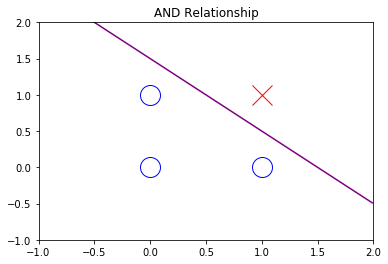

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    [1],
    [1],
    'x',
    color = 'red',
    markersize = 20,
)

plt.plot(
    [0, 0, 1],
    [0, 1, 0],
    'o',
    color = 'blue',
    markerfacecolor = 'none',
    markersize = 20,
)

x = np.arange(-1, 2.0, 0.01)
plt.plot(
    x,
    -x + 1.5,
    '-',
    color = 'purple',
)

plt.title('AND Relationship')
plt.ylim(ymin = -1, ymax = +2)
plt.xlim(xmin = -1, xmax = +2)


(-1, 2)

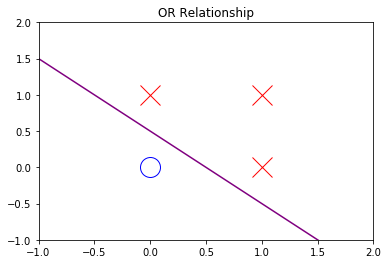

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    [0, 1, 1],
    [1, 0, 1],
    'x',
    color = 'red',
    markersize = 20,
)

plt.plot(
    [0],
    [0],
    'o',
    color = 'blue',
    markerfacecolor = 'none',
    markersize = 20,
)

x = np.arange(-1, 2.0, 0.01)
plt.plot(
    x,
    -x + 0.5,
    '-',
    color = 'purple',
)

plt.title('OR Relationship')
plt.ylim(ymin = -1, ymax = +2)
plt.xlim(xmin = -1, xmax = +2)


Okay! These are binary relationships. There's also an important *unary* relationship: the NOT relationship. But this one is easy. Just set $y = -x + 1$: this flips $x = 1.0 \Rightarrow y = 0$ and $x = 0.0 \Rightarrow y = 1$.

So I've shown you that AND, OR, and NOT are all linearly separable, which means I can train three kinds of logistic regression classifier so that:

1. $Y = 1$ iff $X_1 = 1$ and $X_2 = 1$ (`AND`)
2. $Y = 1$ iff $X_1 = 1$ or $X_2 = 1$ (`OR`)
3. $Y = 1$ iff $X_1 = 1$ (or iff $X_2 = 1$) (`NOT`)

Out of these three kinds of classifiers, I can build any kind of logical relationship. In fact just `AND` (or `OR`) plus `NOT` would be sufficient. In fact `NAND` (which is again a linearly separable relationship) would be sufficient on its own. But enough of these games.

Let me show how to build an `XOR` relationship out of `NOT`s and `AND` and `OR`:

\\[
XOR(X_1, X_2)
:=
\text{OR}\Big(
    \text{AND}\big(
        X_1,
        \text{NOT}\left(
            X_2
        \right)
    \big),
    \text{AND}\big(
        \text{NOT}\left(
            X_1
        \right),
        X_2
    \big)
\Big)
\\]

Or written in logic notation:

\\[
X_1 \oplus X_2
:=
    \big(
        X_1
        \wedge
        \neg X_2
    \big)
\vee
    \big(
        \neg X_1
        \wedge
        X_2
    \big)
\\]

I see three layers of refeaturization here:

1. Take as input $X_1, X_2$, and output $X_1, X_2, \neg X_1, \neg X_2$.
2. Take as input $X_1, X_2, \neg X_1, \neg X_2$ and output $X_1 \wedge \neg X_2, \neg X_1 \wedge X_2$.
3. Take as input $X_1 \wedge \neg X_2, \neg X_1 \wedge X_2$ and output $\big(X_1 \wedge \neg X_2\big) \vee \big(\neg X_1 \wedge X_2\big)$.

Here is what we have done. We've shown that using several layers and some simple boolean operations, you can create *any* kind of boolean circuit. The several layers are important because this could be a multistep process.

Our goal is to *train* the model to learn a non-linear relationship like the XOR. Here is one way to try.

1. You decide to use 5 layers of circuits.
2. Each layer will contain at most 5 units. The "units" are NOT, OR, or AND units.
3. The model gets to decide what kinds of units it wants to use. It gets to decide what inputs it hooks up to each unit.
4. Its goal is output the correct answer for as many examples as possible.